# `CLOUD.jl` - 2D linear advection

In [15]:
using CLOUD
using OrdinaryDiffEq
using LinearAlgebra
using TimerOutputs
plots_path = "../plots/advection_dgsem_2D/"
results_path = "../results/advection_dgsem_2D/";

Define the physical problem

In [16]:
θ = π/4
a = sqrt(2)
A = 1.0  # amplitude
L = 1.0  # domain length
k = (2*π/L, 2*π/L)  # wave number
T = 1.0/(a*max(abs(cos(θ)),abs(cos(θ))))  # end time
initial_data = InitialDataSine(A,k)
conservation_law = linear_advection_equation((a*cos(θ),a*sin(θ)),λ=0.0);

Set up a DGSEM scheme of degree `p` with `M` elements

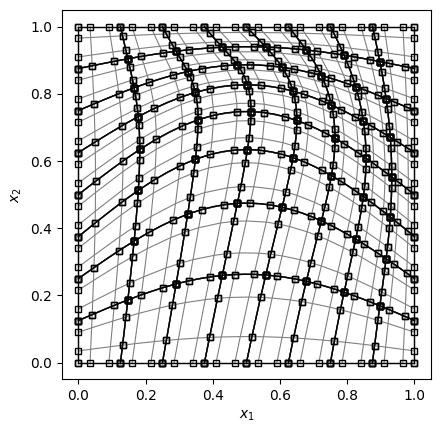

In [17]:
M = 8
p = 3
p_map = p
form = WeakConservationForm(
    SkewSymmetricMapping(),SkewSymmetricCoupling())

reference_approximation =ReferenceApproximation(
    DGSEM(p), Quad(),
    volume_quadrature_rule=LGLQuadrature(),
    facet_quadrature_rule=LGLQuadrature(),mapping_degree=p_map,
    N_plot=ceil(Int,50/M))
mesh = warp_mesh(uniform_periodic_mesh(
    reference_approximation.reference_element, 
    ((0.0,L),(0.0,L)), (M,M), collapsed=true), 
    reference_approximation.reference_element, 0.15)
spatial_discretization = SpatialDiscretization(mesh, 
    reference_approximation);
results_path = save_project(conservation_law,
     spatial_discretization, initial_data, form, (0.0, T), Lazy(),
     results_path, overwrite=true, clear=true)
visualize(spatial_discretization, plots_path, "mesh.pdf", 
    plot_volume_nodes=false, grid_lines=true)

Run the `OrdinaryDiffEq` solver, taking `n_s` snapshots

In [24]:
reset_timer!()
n_s = 2
dt_scale=0.01
dt = dt_scale*(L/M)/(norm(a)*(2*p+1))
ode_problem = semidiscretize(load_project(results_path)...)
save_solution(ode_problem.u0, 0.0, results_path, 0)
sol = solve(ode_problem, RK4(), adaptive=false,
    dt=dt, save_everystep=false,
    callback=save_callback(results_path, ceil(Int, T/(dt*n_s))))
save_solution(last(sol.u), last(sol.t), results_path, "final")

16×16 Matrix{Float64}:
  0.0          0.0          0.0          …   0.0     0.0  0.0  0.0
  0.0          0.0625       0.0              0.0     0.0  0.0  0.0
  0.0          0.0          0.0625           0.0     0.0  0.0  0.0
  0.0          0.0          0.0             -0.0625  0.0  0.0  0.0
  0.0          0.0          0.0              0.0     0.0  0.0  0.0
  0.0          0.0          0.0          …   0.0     0.0  0.0  0.0
  0.0          0.0          0.0              0.0     0.0  0.0  0.0
  0.0          0.0          0.0              0.0     0.0  0.0  0.09178
 -3.29255e-16  0.0          0.0              0.0     0.0  0.0  0.0
  0.0          1.60851e-17  0.0              0.0     0.0  0.0  0.0
  0.0          0.0          2.43626e-17  …   0.0     0.0  0.0  0.0
  0.0          0.0          0.0              0.0     0.0  0.0  0.0
  0.0          0.0          0.0              0.0     0.0  0.0  0.0
  0.0          0.0          0.0              0.0     0.0  0.0  0.0
  0.0          0.0          0.0    

correction:


16×16 Matrix{Float64}:
  0.0          0.0          0.0          …   0.0      0.0  0.0  0.0
  0.0          0.0936164    0.0              0.0      0.0  0.0  0.0
  0.0          0.0          0.0930141        0.0      0.0  0.0  0.0
  0.0          0.0          0.0             -0.09178  0.0  0.0  0.0
  0.0          0.0          0.0              0.0      0.0  0.0  0.0
  0.0          0.0          0.0          …   0.0      0.0  0.0  0.0
  0.0          0.0          0.0              0.0      0.0  0.0  0.0
  0.0          0.0          0.0              0.0      0.0  0.0  0.112407
 -4.47377e-16  0.0          0.0              0.0      0.0  0.0  0.0
  0.0          2.25585e-17  0.0              0.0      0.0  0.0  0.0
  0.0          0.0          2.88142e-17  …   0.0      0.0  0.0  0.0
  0.0          0.0          0.0              0.0      0.0  0.0  0.0
  0.0          0.0          0.0              0.0      0.0  0.0  0.0
  0.0          0.0          0.0              0.0      0.0  0.0  0.0
  0.0          0.0  

16×16 Matrix{Float64}:
  0.0          0.0          0.0          …   0.0       0.0  0.0  0.0
  0.0          0.118725     0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.115723         0.0       0.0  0.0  0.0
  0.0          0.0          0.0             -0.112407  0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0          …   0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.120089
 -5.29249e-16  0.0          0.0              0.0       0.0  0.0  0.0
  0.0          2.71345e-17  0.0              0.0       0.0  0.0  0.0
  0.0          0.0          3.03651e-17  …   0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0 

16×16 Matrix{Float64}:
  0.0          0.0          0.0          …   0.0       0.0  0.0  0.0
  0.0          0.133532     0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.126182         0.0       0.0  0.0  0.0
  0.0          0.0          0.0             -0.120089  0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0          …   0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.116019
 -5.63085e-16  0.0          0.0              0.0       0.0  0.0  0.0
  0.0          2.91853e-17  0.0              0.0       0.0  0.0  0.0
  0.0          0.0          2.91866e-17  …   0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0 

16×16 Matrix{Float64}:
  0.0          0.0          0.0          …   0.0       0.0  0.0  0.0
  0.0          0.136372     0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.124453         0.0       0.0  0.0  0.0
  0.0          0.0          0.0             -0.116019  0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0          …   0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.104638
 -5.48722e-16  0.0          0.0              0.0       0.0  0.0  0.0
  0.0          2.87612e-17  0.0              0.0       0.0  0.0  0.0
  0.0          0.0          2.59496e-17  …   0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0 

16×16 Matrix{Float64}:
  0.0          0.0          0.0          …   0.0       0.0  0.0  0.0
  0.0          0.128053     0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.113763         0.0       0.0  0.0  0.0
  0.0          0.0          0.0             -0.104638  0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0          …   0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0904709
 -4.94283e-16  0.0          0.0              0.0       0.0  0.0  0.0
  0.0          2.63359e-17  0.0              0.0       0.0  0.0  0.0
  0.0          0.0          2.14341e-17  …   0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0          0.0          0.0              0.0       0.0  0.0  0.0
  0.0

16×16 Matrix{Float64}:
  0.0          0.0          0.0          …   0.0        0.0  0.0  0.0
  0.0          0.110976     0.0              0.0        0.0  0.0  0.0
  0.0          0.0          0.0981227        0.0        0.0  0.0  0.0
  0.0          0.0          0.0             -0.0904709  0.0  0.0  0.0
  0.0          0.0          0.0              0.0        0.0  0.0  0.0
  0.0          0.0          0.0          …   0.0        0.0  0.0  0.0
  0.0          0.0          0.0              0.0        0.0  0.0  0.0
  0.0          0.0          0.0              0.0        0.0  0.0  0.0762083
 -4.11536e-16  0.0          0.0              0.0        0.0  0.0  0.0
  0.0          2.25076e-17  0.0              0.0        0.0  0.0  0.0
  0.0          0.0          1.62944e-17  …   0.0        0.0  0.0  0.0
  0.0          0.0          0.0              0.0        0.0  0.0  0.0
  0.0          0.0          0.0              0.0        0.0  0.0  0.0
  0.0          0.0          0.0              0.0        0.0  

16×16 Matrix{Float64}:
  0.0          0.0          0.0          …   0.0        0.0  0.0  0.0
  0.0          0.0881363    0.0              0.0        0.0  0.0  0.0
  0.0          0.0          0.0805416        0.0        0.0  0.0  0.0
  0.0          0.0          0.0             -0.0762083  0.0  0.0  0.0
  0.0          0.0          0.0              0.0        0.0  0.0  0.0
  0.0          0.0          0.0          …   0.0        0.0  0.0  0.0
  0.0          0.0          0.0              0.0        0.0  0.0  0.0
  0.0          0.0          0.0              0.0        0.0  0.0  0.0625
 -3.12528e-16  0.0          0.0              0.0        0.0  0.0  0.0
  0.0          1.78149e-17  0.0              0.0        0.0  0.0  0.0
  0.0          0.0          1.10171e-17  …   0.0        0.0  0.0  0.0
  0.0          0.0          0.0              0.0        0.0  0.0  0.0
  0.0          0.0          0.0              0.0        0.0  0.0  0.0
  0.0          0.0          0.0              0.0        0.0  0.0

16×16 Matrix{Float64}:
 0.0        0.0        0.0        0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0625     0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0625     0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0625        -0.0625  0.0  0.0  0.0
 0.0        0.0        0.0        0.0918047      0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.0822849
 0.0319238  0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0316184  0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0299639  0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0282244      0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0           

16×16 Matrix{Float64}:
 0.0        0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0        0.0898812  0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0856238      0.0        0.0  0.0  0.0
 0.0        0.0        0.0           -0.0822849  0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0934844
 0.0282687  0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0260432  0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0217233  …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0

16×16 Matrix{Float64}:
 0.0        0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0        0.108148   0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0996461      0.0        0.0  0.0  0.0
 0.0        0.0        0.0           -0.0934844  0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0935025
 0.0186705  0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0153616  0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0098966  …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0

16×16 Matrix{Float64}:
 0.0         0.0          0.0         …   0.0        0.0  0.0  0.0
 0.0         0.113329     0.0             0.0        0.0  0.0  0.0
 0.0         0.0          0.101362        0.0        0.0  0.0  0.0
 0.0         0.0          0.0            -0.0935025  0.0  0.0  0.0
 0.0         0.0          0.0             0.0        0.0  0.0  0.0
 0.0         0.0          0.0         …   0.0        0.0  0.0  0.0
 0.0         0.0          0.0             0.0        0.0  0.0  0.0
 0.0         0.0          0.0             0.0        0.0  0.0  0.0860076
 0.00649755  0.0          0.0             0.0        0.0  0.0  0.0
 0.0         0.00314024   0.0             0.0        0.0  0.0  0.0
 0.0         0.0         -0.00194107  …   0.0        0.0  0.0  0.0
 0.0         0.0          0.0             0.0        0.0  0.0  0.0
 0.0         0.0          0.0             0.0        0.0  0.0  0.0
 0.0         0.0          0.0             0.0        0.0  0.0  0.0
 0.0         0.0          0.0    

16×16 Matrix{Float64}:
  0.0          0.0          0.0        …   0.0        0.0  0.0  0.0
  0.0          0.107569     0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0940482      0.0        0.0  0.0  0.0
  0.0          0.0          0.0           -0.0860076  0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0        …   0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0766705
 -0.00484584   0.0          0.0            0.0        0.0  0.0  0.0
  0.0         -0.00752617   0.0            0.0        0.0  0.0  0.0
  0.0          0.0         -0.0113326  …   0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0 

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0961118   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.083515       0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0766705  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.069325
 -0.0133613   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0151264   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0174962  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0    

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0       0.0  0.0  0.0
  0.0         0.0836405   0.0            0.0       0.0  0.0  0.0
  0.0         0.0         0.0741261      0.0       0.0  0.0  0.0
  0.0         0.0         0.0           -0.069325  0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0       0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  0.0649489
 -0.0186731   0.0         0.0            0.0       0.0  0.0  0.0
  0.0        -0.0196361   0.0            0.0       0.0  0.0  0.0
  0.0         0.0        -0.0208362  …   0.0       0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0724396   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0673792      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0649489  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0625
 -0.0213659   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0217488   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0221037  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0      

16×16 Matrix{Float64}:
 0.0        0.0        0.0        0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0625     0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0625     0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0625        -0.0625  0.0  0.0  0.0
 0.0        0.0        0.0        0.0823624      0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.0680152
 0.0588149  0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0580626  0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0541127  0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0499825      0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0           

16×16 Matrix{Float64}:
 0.0        0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0        0.0786279  0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0722116      0.0        0.0  0.0  0.0
 0.0        0.0        0.0           -0.0680152  0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0697472
 0.0501244  0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0449194  0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0351908  …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0

16×16 Matrix{Float64}:
 0.0        0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0        0.0870935  0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0764172      0.0        0.0  0.0  0.0
 0.0        0.0        0.0           -0.0697472  0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0672526
 0.0285413  0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0215551  0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0106445  …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0

16×16 Matrix{Float64}:
 0.0          0.0          0.0        …   0.0        0.0  0.0  0.0
 0.0          0.0859081    0.0            0.0        0.0  0.0  0.0
 0.0          0.0          0.0741024      0.0        0.0  0.0  0.0
 0.0          0.0          0.0           -0.0672526  0.0  0.0  0.0
 0.0          0.0          0.0            0.0        0.0  0.0  0.0
 0.0          0.0          0.0        …   0.0        0.0  0.0  0.0
 0.0          0.0          0.0            0.0        0.0  0.0  0.0
 0.0          0.0          0.0            0.0        0.0  0.0  0.0630523
 0.00423825   0.0          0.0            0.0        0.0  0.0  0.0
 0.0         -0.00173041   0.0            0.0        0.0  0.0  0.0
 0.0          0.0         -0.0100818  …   0.0        0.0  0.0  0.0
 0.0          0.0          0.0            0.0        0.0  0.0  0.0
 0.0          0.0          0.0            0.0        0.0  0.0  0.0
 0.0          0.0          0.0            0.0        0.0  0.0  0.0
 0.0          0.0          0.0   

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0787776   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0684637      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0630523  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0598997
 -0.0144366   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0180856   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0227097  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0   

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0708949   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.063377       0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0598997  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0590244
 -0.0248259   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0263812   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0281163  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0   

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0654693   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0608674      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0590244  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0602011
 -0.0287567   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0291151   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0294159  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0   

16×16 Matrix{Float64}:
  0.0        0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0        0.0630578   0.0            0.0        0.0  0.0  0.0
  0.0        0.0         0.0609437      0.0        0.0  0.0  0.0
  0.0        0.0         0.0           -0.0602011  0.0  0.0  0.0
  0.0        0.0         0.0            0.0        0.0  0.0  0.0
  0.0        0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0        0.0         0.0            0.0        0.0  0.0  0.0
  0.0        0.0         0.0            0.0        0.0  0.0  0.0625
 -0.029458   0.0         0.0            0.0        0.0  0.0  0.0
  0.0       -0.0294393   0.0            0.0        0.0  0.0  0.0
  0.0        0.0        -0.0294097  …   0.0        0.0  0.0  0.0
  0.0        0.0         0.0            0.0        0.0  0.0  0.0
  0.0        0.0         0.0            0.0        0.0  0.0  0.0
  0.0        0.0         0.0            0.0        0.0  0.0  0.0
  0.0        0.0         0.0            0.0        0.0  0.0  0.0

16×16 Matrix{Float64}:
 0.0        0.0        0.0        0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0625     0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0625     0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0625        -0.0625  0.0  0.0  0.0
 0.0        0.0        0.0        0.0680994      0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.054084
 0.0730279  0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0719267  0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0662504  0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0603354      0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            

16×16 Matrix{Float64}:
 0.0        0.0        0.0        …   0.0       0.0  0.0  0.0
 0.0        0.0639427  0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0576748      0.0       0.0  0.0  0.0
 0.0        0.0        0.0           -0.054084  0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0        …   0.0       0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0485626
 0.0605682  0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0531854  0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0396976  …   0.0       0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0        …   0.0

16×16 Matrix{Float64}:
 0.0       0.0        0.0         …   0.0        0.0  0.0  0.0
 0.0       0.0634261  0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0539067       0.0        0.0  0.0  0.0
 0.0       0.0        0.0            -0.0485626  0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0         …   0.0        0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0470593
 0.030666  0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.021375   0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.00736701  …   0.0        0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0 

16×16 Matrix{Float64}:
  0.0           0.0          0.0        …   0.0        0.0  0.0  0.0
  0.0           0.0610036    0.0            0.0        0.0  0.0  0.0
  0.0           0.0          0.0519527      0.0        0.0  0.0  0.0
  0.0           0.0          0.0           -0.0470593  0.0  0.0  0.0
  0.0           0.0          0.0            0.0        0.0  0.0  0.0
  0.0           0.0          0.0        …   0.0        0.0  0.0  0.0
  0.0           0.0          0.0            0.0        0.0  0.0  0.0
  0.0           0.0          0.0            0.0        0.0  0.0  0.0487694
 -0.000546446   0.0          0.0            0.0        0.0  0.0  0.0
  0.0          -0.00761268   0.0            0.0        0.0  0.0  0.0
  0.0           0.0         -0.0169578  …   0.0        0.0  0.0  0.0
  0.0           0.0          0.0            0.0        0.0  0.0  0.0
  0.0           0.0          0.0            0.0        0.0  0.0  0.0
  0.0           0.0          0.0            0.0        0.0  0.0  0.0
  0.0

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0583671   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.051996       0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0487694  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0521066
 -0.0214782   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0249419   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0288416  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0   

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.057091    0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0536466      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0521066  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0558004
 -0.0302878   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0310421   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0314525  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0   

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0576643   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0562656      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0558004  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.059273
 -0.0312798   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.030864    0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0301077  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0    

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0       0.0  0.0  0.0
  0.0         0.0597049   0.0            0.0       0.0  0.0  0.0
  0.0         0.0         0.0593163      0.0       0.0  0.0  0.0
  0.0         0.0         0.0           -0.059273  0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0       0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  0.0625
 -0.0296258   0.0         0.0            0.0       0.0  0.0  0.0
  0.0        -0.0291988   0.0            0.0       0.0  0.0  0.0
  0.0         0.0        -0.0287832  …   0.0       0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  0.0
  0.0         0.0         0.0            0.0       0.0  0.0  0.0

16×16 Matrix{Float64}:
 0.0        0.0        0.0        0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0625     0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0625     0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0625        -0.0625  0.0  0.0  0.0
 0.0        0.0        0.0        0.0541382      0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.0447821
 0.0715061  0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0703683  0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0645398  0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.058473       0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0           

16×16 Matrix{Float64}:
 0.0        0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0        0.0509407  0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0467565      0.0        0.0  0.0  0.0
 0.0        0.0        0.0           -0.0447821  0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0344096
 0.0587218  0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.051175   0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.037494   …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0

16×16 Matrix{Float64}:
 0.0       0.0        0.0         …   0.0        0.0  0.0  0.0
 0.0       0.0438487  0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0374966       0.0        0.0  0.0  0.0
 0.0       0.0        0.0            -0.0344096  0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0         …   0.0        0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0335645
 0.028397  0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.0191089  0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.00527532  …   0.0        0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0             0.0        0.0  0.0  0.0
 0.0       0.0        0.0 

16×16 Matrix{Float64}:
  0.0          0.0          0.0        …   0.0        0.0  0.0  0.0
  0.0          0.0426803    0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0366481      0.0        0.0  0.0  0.0
  0.0          0.0          0.0           -0.0335645  0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0        …   0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0392338
 -0.00243207   0.0          0.0            0.0        0.0  0.0  0.0
  0.0         -0.00920565   0.0            0.0        0.0  0.0  0.0
  0.0          0.0         -0.0179754  …   0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0 

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0458071   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0415732      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0392338  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0469249
 -0.0220891   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0251171   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.028329   …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0   

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0506184   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0483444      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0469249  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0536793
 -0.0293671   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0297389   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0296101  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0   

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0552851   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0543752      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0536793  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0586757
 -0.0291538   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.028497    0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0274338  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0   

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0591777   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0589326      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0586757  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0625
 -0.0268123   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0262827   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0257715  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0      

16×16 Matrix{Float64}:
 0.0        0.0        0.0        0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0625     0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0625     0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0625        -0.0625  0.0  0.0  0.0
 0.0        0.0        0.0        0.0447913      0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.042027
 0.0568742  0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0560166  0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0515959  0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0469892      0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0        0.0            

16×16 Matrix{Float64}:
 0.0        0.0        0.0        …   0.0       0.0  0.0  0.0
 0.0        0.0433615  0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0421253      0.0       0.0  0.0  0.0
 0.0        0.0        0.0           -0.042027  0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0        …   0.0       0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0291534
 0.0471706  0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0414208  0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0309166  …   0.0       0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0            0.0       0.0  0.0  0.0
 0.0        0.0        0.0        …   0.0

16×16 Matrix{Float64}:
 0.0        0.0        0.0         …   0.0        0.0  0.0  0.0
 0.0        0.0320475  0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.0296909       0.0        0.0  0.0  0.0
 0.0        0.0        0.0            -0.0291534  0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.0         …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0266648
 0.0238827  0.0        0.0             0.0        0.0  0.0  0.0
 0.0        0.0166468  0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.00573743  …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0
 0.0       

16×16 Matrix{Float64}:
  0.0           0.0          0.0        …   0.0        0.0  0.0  0.0
  0.0           0.030966     0.0            0.0        0.0  0.0  0.0
  0.0           0.0          0.0278767      0.0        0.0  0.0  0.0
  0.0           0.0          0.0           -0.0266648  0.0  0.0  0.0
  0.0           0.0          0.0            0.0        0.0  0.0  0.0
  0.0           0.0          0.0        …   0.0        0.0  0.0  0.0
  0.0           0.0          0.0            0.0        0.0  0.0  0.0
  0.0           0.0          0.0            0.0        0.0  0.0  0.0320787
 -0.000425572   0.0          0.0            0.0        0.0  0.0  0.0
  0.0          -0.00592876   0.0            0.0        0.0  0.0  0.0
  0.0           0.0         -0.0132067  …   0.0        0.0  0.0  0.0
  0.0           0.0          0.0            0.0        0.0  0.0  0.0
  0.0           0.0          0.0            0.0        0.0  0.0  0.0
  0.0           0.0          0.0            0.0        0.0  0.0  0.0
  0.0

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0369929   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0337945      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0320787  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0408346
 -0.0167272   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0194247   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0224619  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0   

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0453265   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.042609       0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0408346  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0494375
 -0.0235881   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0241756   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0244952  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0   

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0527274   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.050838       0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0494375  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0565443
 -0.0243607   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0240369   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0234479  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0   

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0582492   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0573009      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0565443  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0625
 -0.0230726   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0227401   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0224164  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0      

16×16 Matrix{Float64}:
 0.0       0.0        0.0       0.0        …   0.0     0.0  0.0  0.0
 0.0       0.0625     0.0       0.0            0.0     0.0  0.0  0.0
 0.0       0.0        0.0625    0.0            0.0     0.0  0.0  0.0
 0.0       0.0        0.0       0.0625        -0.0625  0.0  0.0  0.0
 0.0       0.0        0.0       0.0419956      0.0     0.0  0.0  0.0
 0.0       0.0        0.0       0.0        …   0.0     0.0  0.0  0.0
 0.0       0.0        0.0       0.0            0.0     0.0  0.0  0.0
 0.0       0.0        0.0       0.0            0.0     0.0  0.0  0.0450728
 0.035673  0.0        0.0       0.0            0.0     0.0  0.0  0.0
 0.0       0.0352168  0.0       0.0            0.0     0.0  0.0  0.0
 0.0       0.0        0.032821  0.0        …   0.0     0.0  0.0  0.0
 0.0       0.0        0.0       0.0303159      0.0     0.0  0.0  0.0
 0.0       0.0        0.0       0.0            0.0     0.0  0.0  0.0
 0.0       0.0        0.0       0.0            0.0     0.0  0.0  0.0
 0.0 

16×16 Matrix{Float64}:
 0.0       0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0       0.0423732  0.0            0.0        0.0  0.0  0.0
 0.0       0.0        0.0437494      0.0        0.0  0.0  0.0
 0.0       0.0        0.0           -0.0450728  0.0  0.0  0.0
 0.0       0.0        0.0            0.0        0.0  0.0  0.0
 0.0       0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0       0.0        0.0            0.0        0.0  0.0  0.0
 0.0       0.0        0.0            0.0        0.0  0.0  0.0325064
 0.030402  0.0        0.0            0.0        0.0  0.0  0.0
 0.0       0.027245   0.0            0.0        0.0  0.0  0.0
 0.0       0.0        0.0213443  …   0.0        0.0  0.0  0.0
 0.0       0.0        0.0            0.0        0.0  0.0  0.0
 0.0       0.0        0.0            0.0        0.0  0.0  0.0
 0.0       0.0        0.0            0.0        0.0  0.0  0.0
 0.0       0.0        0.0            0.0        0.0  0.0  0.0
 0.0       0.0        0.0        …   0.0 

16×16 Matrix{Float64}:
 0.0        0.0        0.0         …   0.0        0.0  0.0  0.0
 0.0        0.0292898  0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.0308003       0.0        0.0  0.0  0.0
 0.0        0.0        0.0            -0.0325064  0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.0         …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0273399
 0.0173112  0.0        0.0             0.0        0.0  0.0  0.0
 0.0        0.0130738  0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.00645624  …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0
 0.0        0.0        0.0             0.0        0.0  0.0  0.0
 0.0       

16×16 Matrix{Float64}:
 0.0          0.0          0.0        …   0.0        0.0  0.0  0.0
 0.0          0.0260635    0.0            0.0        0.0  0.0  0.0
 0.0          0.0          0.026359       0.0        0.0  0.0  0.0
 0.0          0.0          0.0           -0.0273399  0.0  0.0  0.0
 0.0          0.0          0.0            0.0        0.0  0.0  0.0
 0.0          0.0          0.0        …   0.0        0.0  0.0  0.0
 0.0          0.0          0.0            0.0        0.0  0.0  0.0
 0.0          0.0          0.0            0.0        0.0  0.0  0.0291391
 0.00257063   0.0          0.0            0.0        0.0  0.0  0.0
 0.0         -0.00104955   0.0            0.0        0.0  0.0  0.0
 0.0          0.0         -0.0061149  …   0.0        0.0  0.0  0.0
 0.0          0.0          0.0            0.0        0.0  0.0  0.0
 0.0          0.0          0.0            0.0        0.0  0.0  0.0
 0.0          0.0          0.0            0.0        0.0  0.0  0.0
 0.0          0.0          0.0   

16×16 Matrix{Float64}:
  0.0          0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0          0.0307161   0.0            0.0        0.0  0.0  0.0
  0.0          0.0         0.0293789      0.0        0.0  0.0  0.0
  0.0          0.0         0.0           -0.0291391  0.0  0.0  0.0
  0.0          0.0         0.0            0.0        0.0  0.0  0.0
  0.0          0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0          0.0         0.0            0.0        0.0  0.0  0.0
  0.0          0.0         0.0            0.0        0.0  0.0  0.0356063
 -0.00875621   0.0         0.0            0.0        0.0  0.0  0.0
  0.0         -0.0109695   0.0            0.0        0.0  0.0  0.0
  0.0          0.0        -0.0137741  …   0.0        0.0  0.0  0.0
  0.0          0.0         0.0            0.0        0.0  0.0  0.0
  0.0          0.0         0.0            0.0        0.0  0.0  0.0
  0.0          0.0         0.0            0.0        0.0  0.0  0.0
  0.0          0.0         0.0   

16×16 Matrix{Float64}:
  0.0         0.0        0.0        …   0.0        0.0  0.0  0.0
  0.0         0.039143   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        0.0367777      0.0        0.0  0.0  0.0
  0.0         0.0        0.0           -0.0356063  0.0  0.0  0.0
  0.0         0.0        0.0            0.0        0.0  0.0  0.0
  0.0         0.0        0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0        0.0            0.0        0.0  0.0  0.0
  0.0         0.0        0.0            0.0        0.0  0.0  0.0442387
 -0.0150577   0.0        0.0            0.0        0.0  0.0  0.0
  0.0        -0.016001   0.0            0.0        0.0  0.0  0.0
  0.0         0.0       -0.0170534  …   0.0        0.0  0.0  0.0
  0.0         0.0        0.0            0.0        0.0  0.0  0.0
  0.0         0.0        0.0            0.0        0.0  0.0  0.0
  0.0         0.0        0.0            0.0        0.0  0.0  0.0
  0.0         0.0        0.0            0.0        0.0  0.0  

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0479678   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0456215      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0442387  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0533986
 -0.0174418   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0176592   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0178417  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0   

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0557091   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0542913      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0533986  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0625
 -0.0178672   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0178559   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0178379  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0      

16×16 Matrix{Float64}:
 0.0        0.0        0.0       0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0625     0.0       0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0625    0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0       0.0625        -0.0625  0.0  0.0  0.0
 0.0        0.0        0.0       0.0450204      0.0     0.0  0.0  0.0
 0.0        0.0        0.0       0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0        0.0       0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0       0.0            0.0     0.0  0.0  0.0512562
 0.0150798  0.0        0.0       0.0            0.0     0.0  0.0  0.0
 0.0        0.0149355  0.0       0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.014154  0.0        …   0.0     0.0  0.0  0.0
 0.0        0.0        0.0       0.0133323      0.0     0.0  0.0  0.0
 0.0        0.0        0.0       0.0            0.0     0.0  0.0  0.0
 0.0        0.0        0.0       0.0            0.0     0.0  

16×16 Matrix{Float64}:
 0.0        0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0        0.0465921  0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0493808      0.0        0.0  0.0  0.0
 0.0        0.0        0.0           -0.0512562  0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0        …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0417152
 0.0133532  0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0123019  0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0102614  …   0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0            0.0        0.0  0.0  0.0
 0.0        0.0        0.0

16×16 Matrix{Float64}:
 0.0         0.0         0.0         …   0.0        0.0  0.0  0.0
 0.0         0.0346287   0.0             0.0        0.0  0.0  0.0
 0.0         0.0         0.0387761       0.0        0.0  0.0  0.0
 0.0         0.0         0.0            -0.0417152  0.0  0.0  0.0
 0.0         0.0         0.0             0.0        0.0  0.0  0.0
 0.0         0.0         0.0         …   0.0        0.0  0.0  0.0
 0.0         0.0         0.0             0.0        0.0  0.0  0.0
 0.0         0.0         0.0             0.0        0.0  0.0  0.0353244
 0.00881933  0.0         0.0             0.0        0.0  0.0  0.0
 0.0         0.00725629  0.0             0.0        0.0  0.0  0.0
 0.0         0.0         0.00467482  …   0.0        0.0  0.0  0.0
 0.0         0.0         0.0             0.0        0.0  0.0  0.0
 0.0         0.0         0.0             0.0        0.0  0.0  0.0
 0.0         0.0         0.0             0.0        0.0  0.0  0.0
 0.0         0.0         0.0             0.0   

16×16 Matrix{Float64}:
 0.0         0.0          0.0          …   0.0        0.0  0.0  0.0
 0.0         0.0289103    0.0              0.0        0.0  0.0  0.0
 0.0         0.0          0.0324949        0.0        0.0  0.0  0.0
 0.0         0.0          0.0             -0.0353244  0.0  0.0  0.0
 0.0         0.0          0.0              0.0        0.0  0.0  0.0
 0.0         0.0          0.0          …   0.0        0.0  0.0  0.0
 0.0         0.0          0.0              0.0        0.0  0.0  0.0
 0.0         0.0          0.0              0.0        0.0  0.0  0.0330604
 0.00306922  0.0          0.0              0.0        0.0  0.0  0.0
 0.0         0.00148334   0.0              0.0        0.0  0.0  0.0
 0.0         0.0         -0.000916897  …   0.0        0.0  0.0  0.0
 0.0         0.0          0.0              0.0        0.0  0.0  0.0
 0.0         0.0          0.0              0.0        0.0  0.0  0.0
 0.0         0.0          0.0              0.0        0.0  0.0  0.0
 0.0         0.0   

16×16 Matrix{Float64}:
  0.0          0.0          0.0         …   0.0        0.0  0.0  0.0
  0.0          0.0295114    0.0             0.0        0.0  0.0  0.0
  0.0          0.0          0.0312555       0.0        0.0  0.0  0.0
  0.0          0.0          0.0            -0.0330604  0.0  0.0  0.0
  0.0          0.0          0.0             0.0        0.0  0.0  0.0
  0.0          0.0          0.0         …   0.0        0.0  0.0  0.0
  0.0          0.0          0.0             0.0        0.0  0.0  0.0
  0.0          0.0          0.0             0.0        0.0  0.0  0.0352795
 -0.00228901   0.0          0.0             0.0        0.0  0.0  0.0
  0.0         -0.00355511   0.0             0.0        0.0  0.0  0.0
  0.0          0.0         -0.00535315  …   0.0        0.0  0.0  0.0
  0.0          0.0          0.0             0.0        0.0  0.0  0.0
  0.0          0.0          0.0             0.0        0.0  0.0  0.0
  0.0          0.0          0.0             0.0        0.0  0.0  0.0
  0.0

16×16 Matrix{Float64}:
  0.0          0.0         0.0         …   0.0        0.0  0.0  0.0
  0.0          0.034911    0.0             0.0        0.0  0.0  0.0
  0.0          0.0         0.0347396       0.0        0.0  0.0  0.0
  0.0          0.0         0.0            -0.0352795  0.0  0.0  0.0
  0.0          0.0         0.0             0.0        0.0  0.0  0.0
  0.0          0.0         0.0         …   0.0        0.0  0.0  0.0
  0.0          0.0         0.0             0.0        0.0  0.0  0.0
  0.0          0.0         0.0             0.0        0.0  0.0  0.0416538
 -0.00631144   0.0         0.0             0.0        0.0  0.0  0.0
  0.0         -0.0071452   0.0             0.0        0.0  0.0  0.0
  0.0          0.0        -0.00826462  …   0.0        0.0  0.0  0.0
  0.0          0.0         0.0             0.0        0.0  0.0  0.0
  0.0          0.0         0.0             0.0        0.0  0.0  0.0
  0.0          0.0         0.0             0.0        0.0  0.0  0.0
  0.0          0.0 

16×16 Matrix{Float64}:
  0.0          0.0          0.0        …   0.0        0.0  0.0  0.0
  0.0          0.0431331    0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0419508      0.0        0.0  0.0  0.0
  0.0          0.0          0.0           -0.0416538  0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0        …   0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0512143
 -0.00882054   0.0          0.0            0.0        0.0  0.0  0.0
  0.0         -0.00927543   0.0            0.0        0.0  0.0  0.0
  0.0          0.0         -0.0098423  …   0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0          0.0            0.0        0.0  0.0  0.0
  0.0          0.0 

16×16 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0526183   0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0516256      0.0        0.0  0.0  0.0
  0.0         0.0         0.0           -0.0512143  0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0        …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0625
 -0.0100926   0.0         0.0            0.0        0.0  0.0  0.0
  0.0        -0.0102734   0.0            0.0        0.0  0.0  0.0
  0.0         0.0        -0.0104411  …   0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0        0.0  0.0  0.0
  0.0         0.0         0.0            0.0      

correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:
correction:


Visualize the solution

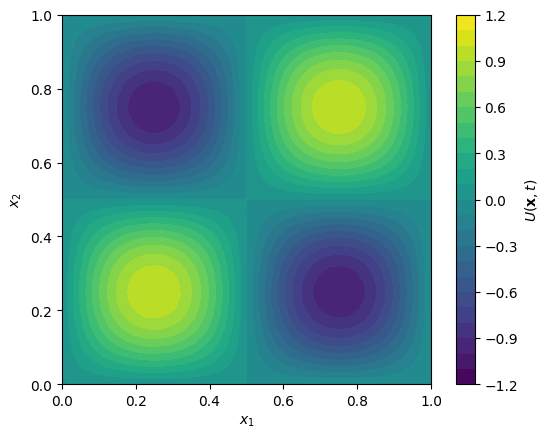

In [19]:
plotter = Plotter(spatial_discretization, plots_path)
visualize(initial_data, plotter, "exact.pdf", u_range=[-1.0,1.0], contours=25,
    label="U(\\mathbf{x},t)")

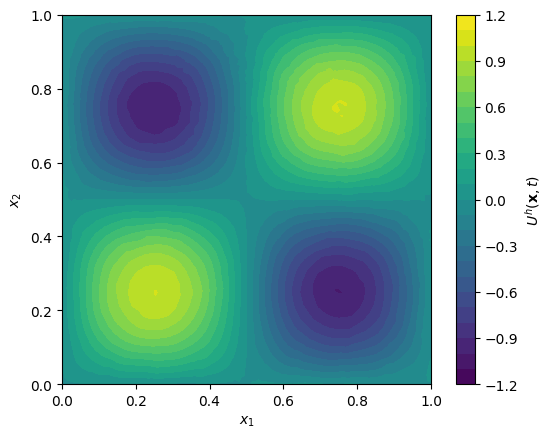

In [20]:
visualize(last(sol.u),plotter, "approx.pdf", u_range=[-1.0,1.0], contours=25, 
    label="U^h(\\mathbf{x},t)")

Calculate the integral L<sup>2</sup> error norm and conservation/energy error

In [21]:
error_analysis = ErrorAnalysis(results_path, conservation_law, 
    spatial_discretization)
conservation_analysis = PrimaryConservationAnalysis(results_path, 
    conservation_law, spatial_discretization)
energy_analysis = EnergyConservationAnalysis(results_path, 
    conservation_law, spatial_discretization)
println("L2 error:\n", analyze(error_analysis, last(sol.u), initial_data))
println("Conservation (initial/final/diff):\n", analyze(conservation_analysis)...)
println("Energy (initial/final/diff):\n",analyze(energy_analysis)...)

L2 error:
[0.009001809306961931]


LoadError: ArgumentError: No file exists at given path: ../results/advection_dgsem_2D/res_final.jld2